I think it's obvious where to put the $\epsilon$ term -- as a basal term of expression

Of course there are more parameters than just the basal expression rate. The change in behavior given increasing basal expression rate is natually conditional to a particular set of parameters. The starting set of parameters should admit an $\omega$-limit cycle.

specific tasks:

1. write the equations and non-dimensionalize them. At this stage I can "cheat" to set some of the parameters to be symmetric
2. Study the bifurcation diagram of each parameter (can also plot some stability diagrams as Fig. 2b in Elowitz 2000) to get a grasp of the permitted range of parameters
3. pick a few (typically biologically relevant) combinaitons of parameters. Plot the bifurcation diagram against leaky expression. Include fraquency in these bifurcation diagrams
4. Plot selective stability diagram including the leaky strength, or other two parameter with a few fixed leaky strength (basically 3D)

# Repressilator

$$
\frac{d}{dt}{p_i} = \alpha_0 + \frac{\alpha}{1 + p_{i - 1}^n} - p_i
$$

Where $i = 1, 2, 3$. The index wraps around so that $1 - 1$ gives 3. A similar model is described in Elowitz and Stanislas 2000. Here I "lumped together" transcription and translation, unlike in Elowitz's paper where the two steps have individual equations.
The unit of time is $1/\beta$ and the unit concentration is $K_M$.

A sufficient condition for the equalibrium $(p_*, p_*, p_*)$ to be stable is

$$
\frac{p_*^{n - 1}}{(1 + p_*^n)^2} < \frac{2}{\alpha n}
$$

Where $p_*$ satisfies

$$
\alpha_0 + \frac{\alpha}{1 + p_*^n} - p_* = 0
$$

## IVP

In [2]:
from scipy.integrate import solve_ivp
from scipy.optimize import minimize
import matplotlib
from matplotlib import pyplot as plt
import numpy as np

lhs = 2.8021. if lhs > 0 solution is stable


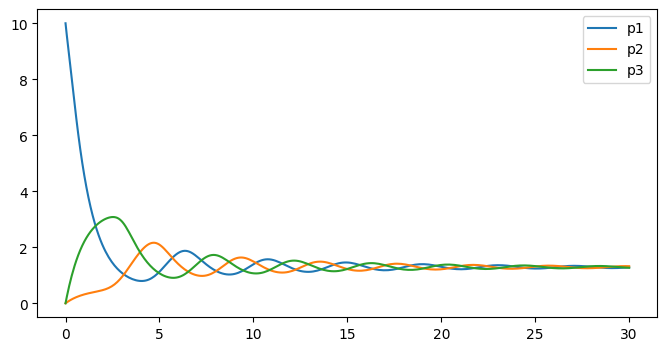

In [3]:
# solve with given parameters
a0 = 0.5
a = 3
n = 4

# initial condition
p0 = [10, 0, 0]

# model
def repressilator(t, p, a0, a, n):
    p1, p2, p3 = p
    f1 = a0 + a/(1 + p3**n) - p1
    f2 = a0 + a/(1 + p1**n) - p2
    f3 = a0 + a/(1 + p2**n) - p3
    return [f1, f2, f3]

# solve
tmax = 30
sol = solve_ivp(repressilator, (0, tmax), p0, args=(a0, a, n), atol=1e-8, rtol=1e-8)

# stability test
# find p*
def symmetric_rhs(pss, a0, a, n):
    return a0 + a/(1 + pss**n) - pss

ret = minimize(lambda x: (symmetric_rhs(x, a0, a, n))**2, 10, method="Nelder-Mead")
pss = ret.x[0]

# show the test result
def stability_test(pss, a0, a, n):
    return 2*(1 + pss**n)**2 - a*n*pss**(n - 1)
lhs = stability_test(pss, a0, a, n)
print("lhs = %.4f. if lhs > 0 solution is stable"%lhs)

# plot
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.plot(sol.t, sol.y.transpose())
ax.legend(labels=["p1", "p2", "p3"]);

## Stability plot

In [4]:
def stability_test_para(a0, a, n):
    # find eq
    ret = minimize(lambda x: symmetric_rhs(x, a0, a, n)**2, 1, bounds=[(0, None)], method="Powell")
    pss = ret.x[0]
    
    # lhs of stability test
    lhs = stability_test(pss, a0, a, n)
    return lhs

/home/randolph/miniconda3/envs/kaiabc/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


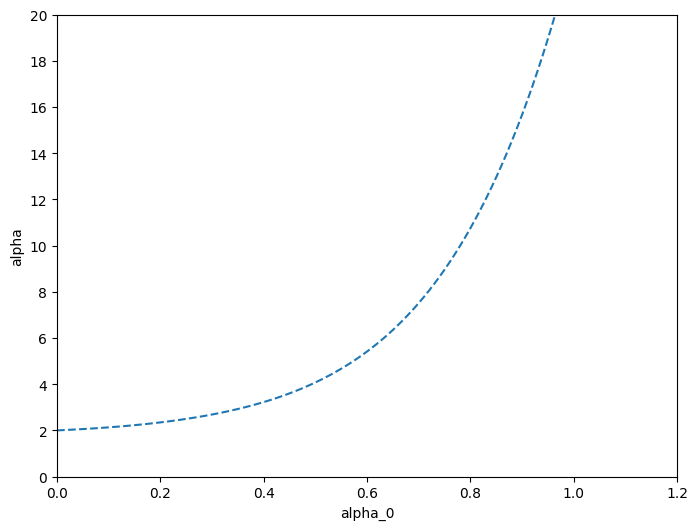

In [5]:
# a - a0

#a0 = 0
#a = 10
n = 4

a0_vec = np.arange(0, 1.21, 0.01)
a_vec = np.zeros(len(a0_vec))
for i, a0 in enumerate(a0_vec):
    # find boundary a
    ret = minimize(lambda x: stability_test_para(a0, x, n)**2, 10, method="COBYLA")
    a_vec[i] = ret.x
    
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
# filter out a0 where no oscillation can be found
ax.plot(a0_vec, [ np.nan if a < 1e-2 else a for a in a_vec ], linestyle="dashed")
ax.set_ylim((0, 20))
ax.set_yticks(np.arange(0, 22, 2))
ax.set_xlabel("alpha_0")
ax.set_ylabel("alpha")
ax.set_xlim((min(a0_vec), max(a0_vec)));

/home/randolph/miniconda3/envs/kaiabc/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/tmp/ipykernel_4771/414590330.py:24: RuntimeWarning: invalid value encountered in power
  return a0 + a/(1 + pss**n) - pss


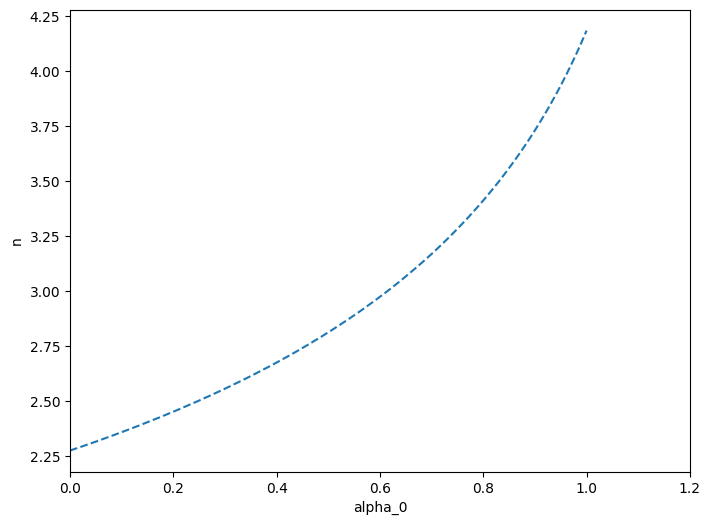

In [8]:
# n - a0

#a0 = 0
a = 20
#n = 4

a0_vec = np.arange(0, 1.21, 0.01)
n_vec = np.zeros(len(a0_vec))
for i, a0 in enumerate(a0_vec):
    # find boundary a
    ret = minimize(lambda x: stability_test_para(a0, a, x)**2, 2, method="COBYLA")
    n_vec[i] = ret.x
    
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
# filter out a0 where no oscillation can be found
ax.plot(a0_vec, [ np.nan if n < 1 else n for n in n_vec ], linestyle="dashed")
ax.set_xlabel("alpha_0")
ax.set_ylabel("n")
#ax.set_ylim((2, 4.5))
ax.set_xlim((min(a0_vec), max(a0_vec)));

## Numerically period determination

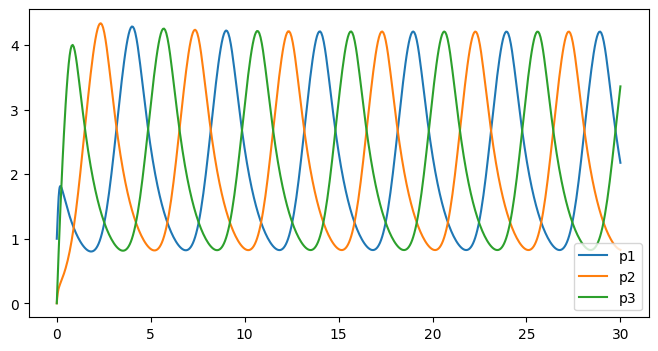

In [184]:
a0 = 0.4
a = 8
n = 4

tmax = 30

p0 = [1, 0, 0]

sol = solve_ivp(repressilator, (0, tmax), p0, args=(a0, a, n), atol=1e-8, rtol=1e-8)

fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.plot(sol.t, sol.y.transpose())
ax.legend(labels=["p1", "p2", "p3"])

# what is the period?

# I'll continue in julia because the helper functions are written in julia